In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the data
data = pd.read_csv('E-com_data.csv')
rows, cols = data.shape
print(f'The data has {rows} rows and {cols} columns.')

The data has 537979 rows and 12 columns.


In [6]:
# Number of freatures
cat_feat = []
num_feat = []
for attribute in data.columns:
    if data[attribute].dtype == '0':

        cat_feat.append(attribute)
    else:
        num_feat.append(attribute)

print(f'We have {len(cat_feat)} categorical and {len(num_feat)} numerical features.')        

We have 0 categorical and 12 numerical features.


In [7]:
# Percentage of missing value.
np.round(data.isnull().mean()*100, 2)

CustomerID            24.87
Item Code              0.00
InvoieNo               0.00
Date of purchase       0.00
Quantity               0.00
Time                   0.00
price per Unit         0.00
Price                  0.00
Shipping Location      0.00
Cancelled_status      98.45
Reason of return     100.00
Sold as set          100.00
dtype: float64

In [8]:
! pip install pandas_profiling

^C


In [63]:
data.columns

Index(['CustomerID', 'InvoiceNo', 'Date', 'Price'], dtype='object')

In [15]:
data = data.rename(columns={'InvoieNo' : 'InvoiceNo', 'Date of purchase': 'Date' })
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,29-10-2017,1926.0
1,4352.0,394422,05-10-2017,1740.0
2,4352.0,394422,12-10-2017,1866.0
3,4352.0,388633,22-08-2017,1869.0
4,4352.0,394422,10-10-2017,1888.0


In [16]:
print('Number of duplicates before treating:', data.duplicated().sum())
data = data.drop_duplicates(ignore_index=True)
print('Number of duplicates after treating:', data.duplicated().sum())

Number of duplicates before treating: 2872
Number of duplicates after treating: 0


In [17]:
# Missing values
data.isna().sum()

CustomerID    132248
InvoiceNo          0
Date               0
Price              0
dtype: int64

In [18]:
# Removing missing values in customer id
data = data.dropna(subset=['CustomerID'])
data.isna().sum()

CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  int64  
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ MB


In [20]:
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   CustomerID  402859 non-null  float64       
 1   InvoiceNo   402859 non-null  int64         
 2   Date        402859 non-null  datetime64[ns]
 3   Price       402859 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 15.4 MB


In [22]:
data.describe()

,CustomerID,InvoiceNo,Price
count,402859.000000,402859.000000,402859.000000
mean,2182.187224,385642.971491,2477.465103
std,1252.636483,13106.663884,4896.268647
min,2.000000,361429.000000,-10152.000000
25%,1207.000000,374193.000000,556.000000
50%,2078.000000,386934.000000,1572.000000
75%,3291.000000,397130.000000,2496.000000
max,4372.000000,406651.000000,90400.000000


In [23]:
data['Date'].describe()

count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [24]:
latest_date = dt.datetime(2017, 12, 20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [25]:
data.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177,2017-10-29,1926.0
1,4352.0,394422,2017-05-10,1740.0
2,4352.0,394422,2017-12-10,1866.0
3,4352.0,388633,2017-08-22,1869.0
4,4352.0,394422,2017-10-10,1888.0


In [26]:
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x: (latest_date - x.max()).days,
                                           'InvoiceNo': lambda x : x.count(),
                                           'Price': lambda x: x.sum()})

RFMScore.rename(columns = {'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetory'}, inplace=True)
RFMScore.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,181,550416.0
3.0,77,27,257404.0
4.0,20,72,176613.0
5.0,18,16,41976.0
6.0,9,84,151822.0


In [27]:
RFMScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0
...,...,...,...,...
4344,4368.0,17,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,12,13,24962.0
4347,4371.0,4,751,279720.0


In [28]:
for attribute in RFMScore:
    print(f'For {attribute} the min value is {RFMScore[attribute].min()} and max value is {RFMScore[attribute].max()}')

For Recency the min value is 1 and max value is 617
For Frequency the min value is 1 and max value is 7919
For Monetory the min value is -50372.0 and max value is 35472089.0


In [29]:
RFMScore.describe()

,Recency,Frequency,Monetory
count,4349.000000,4349.000000,4.349000e+03
mean,61.445160,92.632559,2.294939e+05
std,89.656941,230.742279,8.556685e+05
min,1.000000,1.000000,-5.037200e+04
25%,10.000000,17.000000,3.814000e+04
50%,19.000000,42.000000,8.363500e+04
75%,73.000000,101.000000,2.054440e+05
max,617.000000,7919.000000,3.547209e+07


In [30]:
quantile = RFMScore.quantile(q=[0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [31]:
def recency_score(x, p, d):
    # x - condition, p - percentile/quantile, d - data point
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnM_Score(x, p, d):
    # x - condition, p - percentile/quantile, d - data point
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [32]:
RFMScore['R'] = RFMScore["Recency"].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F'] = RFMScore["Frequency"].apply(FnM_Score, args=('Frequency', quantile, ))
RFMScore['M'] = RFMScore["Monetory"].apply(FnM_Score, args=('Monetory', quantile, ))

In [33]:
RFMScore.reset_index(inplace=True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2


In [34]:
RFMScore['RFM'] = RFMScore.R.map(str) + RFMScore.F.map(str) + RFMScore.M.map(str)
RFMScore['RFM_Score'] = RFMScore[['R', 'F', 'M']].sum(axis=1)
RFMScore.reset_index(inplace=True)
RFMScore.head()

,index,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score
0,0,2.0,4,181,550416.0,1,1,1,111,3
1,1,3.0,77,27,257404.0,4,3,1,431,8
2,2,4.0,20,72,176613.0,3,2,2,322,7
3,3,5.0,18,16,41976.0,2,4,3,243,9
4,4,6.0,9,84,151822.0,1,2,2,122,5


In [35]:
Loyal_customer = ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cuts = pd.qcut(RFMScore.RFM_Score, 4, labels=Loyal_customer)
RFMScore['Loyality'] = score_cuts.values
RFMScore.reset_index(inplace=True)
del RFMScore['index']
RFMScore.head()

,level_0,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyality
0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [36]:
RFMScore.to_csv('Segmentation_analysis.csv')

In [37]:
RFMScore['Loyality'].value_counts()

Platinum    1308
Gold        1289
Silver       940
Bronze       812
Name: Loyality, dtype: int64

In [38]:
# Visualisation

In [39]:
RFMScore.head()

,level_0,CustomerID,Recency,Frequency,Monetory,R,F,M,RFM,RFM_Score,Loyality
0,0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [40]:
new_data = RFMScore.groupby('Loyality')[['Recency', 'Frequency', 'Monetory', 'CustomerID']].agg({
                    'Recency': 'sum', 'Frequency': 'sum', 'Monetory': 'sum', 'CustomerID': 'nunique'})
new_data = new_data.rename(columns={'CustomerID': 'No_of_customers'})
new_data.reset_index(inplace=True)

In [41]:
new_data.head()

,Loyality,Recency,Frequency,Monetory,No_of_customers
0,Platinum,13340,297150,765731356.0,1308
1,Gold,42079,73994,160271639.0,1289
2,Silver,78927,23588,52766014.1,940
3,Bronze,132879,8127,19300105.0,812


In [42]:
new_data['Percentage'] = round(new_data['No_of_customers']/len(RFMScore)*100, 2)
new_data

,Loyality,Recency,Frequency,Monetory,No_of_customers,Percentage
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [43]:
vis_data = new_data.drop(['Recency', 'Frequency', 'Monetory'], axis=1)
vis_data.head()

,Loyality,No_of_customers,Percentage
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


In [44]:
!pip install squarify


[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


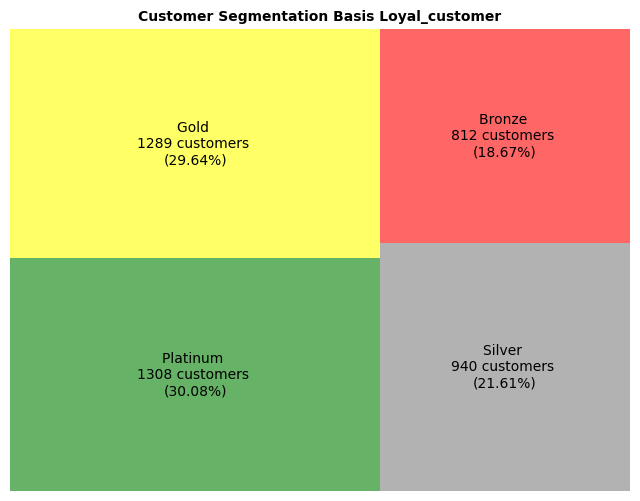

In [45]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8,6)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'red'}

squarify.plot(sizes=vis_data['No_of_customers'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*vis_data.iloc[i])
                      for i in range(0, len(vis_data))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=10, fontweight='bold')
plt.axis("off")
plt.show()

In [46]:
# Building unsupervised model

In [47]:
unsupervised_data = RFMScore.iloc[:, 1:4]
unsupervised_data.head()

,CustomerID,Recency,Frequency
0,2.0,4,181
1,3.0,77,27
2,4.0,20,72
3,5.0,18,16
4,6.0,9,84


In [48]:
# Mandatory preprocessing - Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
unsupervised_data_sc = sc.fit_transform(unsupervised_data)
unsupervised_data_sc

array([[-1.73227732, -0.64079551,  0.38301434],
       [-1.73148455,  0.17351282, -0.28447368],
       [-1.73069178, -0.46231697, -0.08942848],
       ...,
       [ 1.73054376, -0.55155624, -0.34515441],
       [ 1.73133653, -0.64079551,  2.85358691],
       [ 1.73212931, -0.1165148 , -0.10676583]])

In [49]:
scaled_data = pd.DataFrame(unsupervised_data_sc, index=unsupervised_data.index, columns= unsupervised_data.columns)
scaled_data

,CustomerID,Recency,Frequency
0,-1.732277,-0.640796,0.383014
1,-1.731485,0.173513,-0.284474
2,-1.730692,-0.462317,-0.089428
3,-1.729899,-0.484627,-0.332151
4,-1.729106,-0.585021,-0.037416
...,...,...,...
4344,1.728958,-0.495782,-0.358157
4345,1.729751,1.333623,-0.371160
4346,1.730544,-0.551556,-0.345154
4347,1.731337,-0.640796,2.853587


In [50]:
# Import model
from sklearn.cluster import KMeans

wcss = []
for i in range(2,15):
    KM = KMeans(n_clusters=i, init='k-means++',max_iter=1000, random_state=1)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

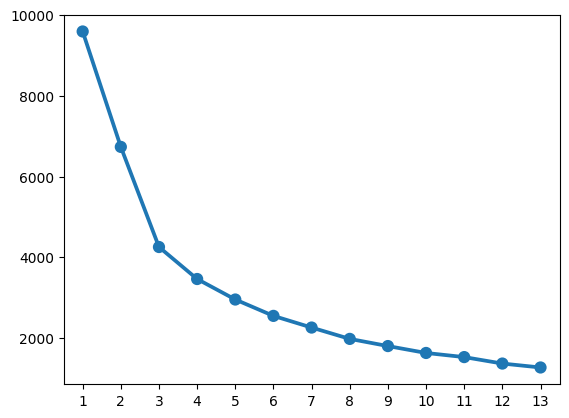

In [51]:
# Elbow curve
sns.pointplot(x=list(range(1,14)), y=wcss)
plt.show()

In [52]:
KM = KMeans(n_clusters=6, init='k-means++', max_iter=1000, random_state=42)
y_kmeans = KM.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 4, 5, 4])

In [53]:
scaled_data['Clusters'] = KM.labels_
scaled_data.head()

,CustomerID,Recency,Frequency,Clusters
0,-1.732277,-0.640796,0.383014,0
1,-1.731485,0.173513,-0.284474,0
2,-1.730692,-0.462317,-0.089428,0
3,-1.729899,-0.484627,-0.332151,0
4,-1.729106,-0.585021,-0.037416,0


In [54]:
scaled_data['Clusters'].value_counts()

4    1277
0    1230
1    1214
2     527
5      97
3       4
Name: Clusters, dtype: int64

In [55]:
unsupervised_data['Clusters'] = KM.labels_
unsupervised_data.head()

,CustomerID,Recency,Frequency,Clusters
0,2.0,4,181,0
1,3.0,77,27,0
2,4.0,20,72,0
3,5.0,18,16,0
4,6.0,9,84,0


In [70]:
scaled_data.to_csv('customer_clusters.csv')

In [71]:
scaled_data['Recency'].value_counts()

-0.585021    433
-0.573866    289
-0.462317    212
-0.562711    164
-0.518092    121
            ... 
 0.720103      1
 1.155145      1
 5.862516      1
 0.363146      1
 1.835594      1
Name: Recency, Length: 279, dtype: int64

In [72]:
scaled_data.head()

,CustomerID,Recency,Frequency,Clusters
0,-1.732277,-0.640796,0.383014,0
1,-1.731485,0.173513,-0.284474,0
2,-1.730692,-0.462317,-0.089428,0
3,-1.729899,-0.484627,-0.332151,0
4,-1.729106,-0.585021,-0.037416,0


In [73]:
data.columns

Index([], dtype='object')